# Problem Statemnt

To predict weather the SMS is Spam or Ham

# Importing library


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics 
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [2]:
data=pd.read_excel("/content/drive/MyDrive/Data set/spam.xlsx")
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
print(data.shape)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5571 entries, 0 to 5570
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5571 non-null   object
 1   v2          5571 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.7+ KB


In [4]:
data =data.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1)
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
data.isnull().sum().sum()

0

In [6]:
data.duplicated().sum()

403

In [7]:
data =data.drop_duplicates(keep="first")

In [8]:
data.duplicated().sum()

0

# Encoding

In [9]:
data = pd.get_dummies(data, columns = ["v1"],drop_first = True) 
data.head()

,v2,v1_spam
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [10]:
# 0 ----> Ham
# 1 ----> Spam

In [11]:
data.rename(columns={"v2":"SMS","v1_spam":"Spam_or_Ham",},inplace=True)

In [12]:
data["Spam_or_Ham"].value_counts()

0    4515
1     653
Name: Spam_or_Ham, dtype: int64

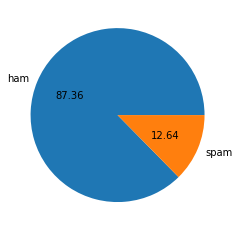

In [13]:
plt.pie(data["Spam_or_Ham"].value_counts(),labels=["ham","spam"],autopct="%.2f")
plt.show()

# Splitting a Data

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X=data["SMS"]

In [16]:
y= data["Spam_or_Ham"]


In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25, random_state = 0 )

In [18]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(3876,)
(1292,)
(3876,)
(1292,)


# FEATURE EXTRACTION

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [20]:
fe=TfidfVectorizer(min_df=1, stop_words="english", lowercase=True)

In [21]:
X_train_fe=fe.fit_transform(X_train)
X_test_fe=fe.transform(X_test)

In [22]:
print(X_test_fe)

  (0, 6948)	0.33893294697666065
  (0, 6607)	0.2702338912888097
  (0, 5804)	0.37131462242577157
  (0, 3088)	0.4613534533332958
  (0, 3087)	0.3507916091296437
  (0, 2322)	0.3798329042019104
  (0, 1268)	0.4405096543467019
  (1, 5496)	0.7753124837742164
  (1, 2886)	0.6315778277487702
  (2, 7091)	0.5934544499566744
  (2, 6752)	0.6746005520094338
  (2, 6330)	0.4390055934213005
  (3, 6386)	0.7433125480835577
  (3, 3996)	0.6689442845719877
  (4, 7032)	0.22630336212168078
  (4, 7007)	0.30893702752199553
  (4, 6330)	0.19196187367941303
  (4, 5529)	0.20177636289280992
  (4, 4904)	0.3856545538099971
  (4, 4521)	0.21639202753769968
  (4, 3877)	0.2719910427327389
  (4, 3659)	0.18625775976739695
  (4, 3335)	0.23903282832309067
  (4, 3105)	0.2949793530867892
  (4, 2994)	0.2237673523082949
  :	:
  (1285, 2249)	0.34966429655132963
  (1286, 4525)	0.28509281830732097
  (1286, 4182)	0.5411907862017923
  (1286, 3132)	0.577312624676842
  (1286, 2342)	0.42194103095994867
  (1286, 2249)	0.3383940272242793
  (1

In [23]:
print(X_train_fe.shape)
print(X_test_fe.shape)

(3876, 7100)
(1292, 7100)


# Model 

## LogisticRegression

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [25]:
model1 = LogisticRegression()

In [26]:
model1.fit(X_train_fe,y_train)
y_pred_train = model1.predict(X_train_fe)
y_pred_test = model1.predict(X_test_fe)

In [27]:
print(accuracy_score(y_train,y_pred_train))
print(accuracy_score(y_test,y_pred_test))

0.9602683178534571
0.9651702786377709


In [28]:
confusion_matrix(y_test, y_pred_test)

array([[1122,    0],
       [  45,  125]])

In [29]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1122
           1       1.00      0.74      0.85       170

    accuracy                           0.97      1292
   macro avg       0.98      0.87      0.91      1292
weighted avg       0.97      0.97      0.96      1292



## KNeighborsClassifier

In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
model3 = KNeighborsClassifier(n_neighbors=5)

In [32]:
model3.fit(X_train_fe,y_train)
y_pred_train = model3.predict(X_train_fe)
y_pred_test = model3.predict(X_test_fe)

In [33]:
print(accuracy_score(y_train,y_pred_train))
print(accuracy_score(y_test,y_pred_test))

0.9143446852425181
0.9024767801857585


In [34]:
confusion_matrix(y_test, y_pred_test)

array([[1122,    0],
       [ 126,   44]])

In [35]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1122
           1       1.00      0.26      0.41       170

    accuracy                           0.90      1292
   macro avg       0.95      0.63      0.68      1292
weighted avg       0.91      0.90      0.88      1292



## DecisionTreeClassifier

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
model4 = DecisionTreeClassifier()

In [38]:
model4.fit(X_train_fe,y_train)
y_pred_train = model4.predict(X_train_fe)
y_pred_test = model4.predict(X_test_fe)

In [39]:
print(accuracy_score(y_train,y_pred_train))
print(accuracy_score(y_test,y_pred_test))

1.0
0.9613003095975232


In [40]:
confusion_matrix(y_test, y_pred_test)

array([[1107,   15],
       [  35,  135]])

In [41]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1122
           1       0.90      0.79      0.84       170

    accuracy                           0.96      1292
   macro avg       0.93      0.89      0.91      1292
weighted avg       0.96      0.96      0.96      1292



## RandomForestClassifier

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
model5 = RandomForestClassifier(n_estimators = 100)

In [44]:
model5.fit(X_train_fe,y_train)
y_pred_train = model5.predict(X_train_fe)
y_pred_test = model5.predict(X_test_fe)

In [45]:
print(accuracy_score(y_train,y_pred_train))
print(accuracy_score(y_test,y_pred_test))

0.9997420020639834
0.9736842105263158


In [46]:
confusion_matrix(y_test, y_pred_test)

array([[1122,    0],
       [  34,  136]])

In [47]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1122
           1       1.00      0.80      0.89       170

    accuracy                           0.97      1292
   macro avg       0.99      0.90      0.94      1292
weighted avg       0.97      0.97      0.97      1292



# Saving our model

In [48]:
import joblib

In [49]:
joblib.dump(model5,"Spam_model5.pkl")

['Spam_model5.pkl']

# Checking our Model

In [50]:
a=joblib.load("/content/Spam_model5.pkl")

In [62]:
b=["A [redacted] loan for £950 is approved for you if you receive this SMS. 1 min verification & cash in 1 hr at www.[redacted].co.uk to opt out reply stop"]
c=fe.transform(b)
print(c)

  (0, 6994)	0.2392110178310019
  (0, 6531)	0.2588047343975875
  (0, 5971)	0.22115225267493357
  (0, 5753)	0.26773679664784705
  (0, 5258)	0.22013174515534226
  (0, 5172)	0.2806275777272226
  (0, 4569)	0.3231720770498686
  (0, 4137)	0.2533359240010742
  (0, 3853)	0.3468903355111877
  (0, 3260)	0.3468903355111877
  (0, 1565)	0.2457384097328561
  (0, 957)	0.3979002476986552


In [63]:
kk=a.predict(c)
if (kk==1):
  print("Spam")
else:
  print("Ham")

Spam
